## **Background**

Sebuah supermarket telah melaksanakan total enam kampanye pemasaran selama tiga tahun terakhir. Untuk meningkatkan tingkat jumlah sales perusahaan melalui kampanye yang efektif, perusahaan bermaksud untuk menganalisis kampanye yang telah dilaksanakan berdasarkan prinsip segmentasi, posisi, dan penargetan. Analisis ini diharapkan akan membantu tim pemasaran dalam merumuskan strategi bisnis yang tepat.

Segmentasi melibatkan pembagian basis pelanggan menjadi kelompok-kelompok yang berbeda berdasarkan karakteristik khusus, seperti demografi, perilaku, atau preferensi. Posisi berhubungan dengan cara perusahaan menyajikan produk atau layanan dalam pasar, mempertimbangkan faktor-faktor seperti harga, kualitas, dan citra merek. Penargetan adalah proses mengidentifikasi segmen pelanggan yang paling relevan dan menyesuaikan upaya pemasaran untuk mencapai dan melibatkan segmen tersebut dengan efektif.

Dengan menganalisis kampanye-kampanye terdahulu melalui sudut pandang ini, perusahaan bertujuan untuk mendapatkan wawasan tentang apa yang paling berhasil dan memahami segmen pelanggan mana yang paling responsif. Wawasan ini akan membantu tim pemasaran menciptakan kampanye yang lebih terarah dan sukses di masa depan, yang pada akhirnya akan berkontribusi pada pertumbuhan bisnis.

## **Problem Statement**

Sebagai seorang analis data, kita akan mencoba menjawab pertanyaan berikut:

Perusahaan ingin mengetahui, dari kampanye-kampanye yang telah dilaksanakan dari 1 hingga 6, kampanye mana yang paling sukses, dan faktor-faktor apa yang memengaruhi kesuksesan kampanye-kampanye tersebut sehingga mereka dapat mengembangkan strategi pemasaran berikutnya yang berkontribusi pada peningkatan sales?

untuk menjawab pertanyaan tersebut maka perlu mengindentifikasi hal ini:

1. Campaign manakah yang paling banyak mendapatkan response yang baik?
2. Campaign manakah yang memiliki jumlah pembelian terbanyak  berdasarkan produk yang dibeli?
3. Campaign terbaik, Apa jenis produk yang paling diminati oleh konsumen di setiap keluarga ?
4. Campaign terbaik, Siapa yang paling banyak melakukan pembelian di setiap jenis produk berdasarkan umur?
5. Campaign terbaik, bagaimana perilaku konsumen terhadap diskon?
<br>


## **Data Explanation**

**People**
-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Income: Customer's yearly household income
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
-   AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
-   AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
-   AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
-   AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
-   Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
-   NumWebPurchases: Number of purchases made through the company’s website
-   NumCatalogPurchases: Number of purchases made using a catalog
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to the company’s website in the last month

**Numerical & Categorical**
- Ordinal : Educational
- Nominal : Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response
- Discrete: Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Recenc
- Continue: Year_Birth, Age, Income
- Datetime : Dt_Customer

## **Import Library**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import math
import plotly.express as px
from phik import phik_matrix, significance_matrix
from phik.report import plot_correlation_matrix
import scipy.stats as stats
from scipy.stats import spearmanr, normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest 
import matplotlib.pyplot as plt
from matplotlib import lines, patches
from scipy.stats import shapiro, kstest, normaltest

import warnings
warnings.filterwarnings("ignore")

In [3]:
#membaca csv
df = pd.read_csv('Supermarket Customers.csv', delimiter=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2240, 29)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.000000,False,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,False,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,False,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,False,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,False,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,False,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,False,3,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,False,663,"[04/09/12, 08/03/14, 21/08/13, 10/02/14, 19/01..."
8,Recency,int64,0.000000,False,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,False,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


## **1.Data Understanding and Cleaning**
Before delving into the analysis, we need to get to know our dataset better in the data understanding stage. From this process, we will identify the anomalies present in our dataset that need to be addressed during the data cleaning phase. Every anomaly treatment performed will be accompanied by a justification for the steps taken, both based on domain knowledge and statistical considerations.

In [5]:
#check non null data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#check each columns summaries
display(df.describe(), df.describe(include='object'))


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31/08/12
freq,1127,864,12


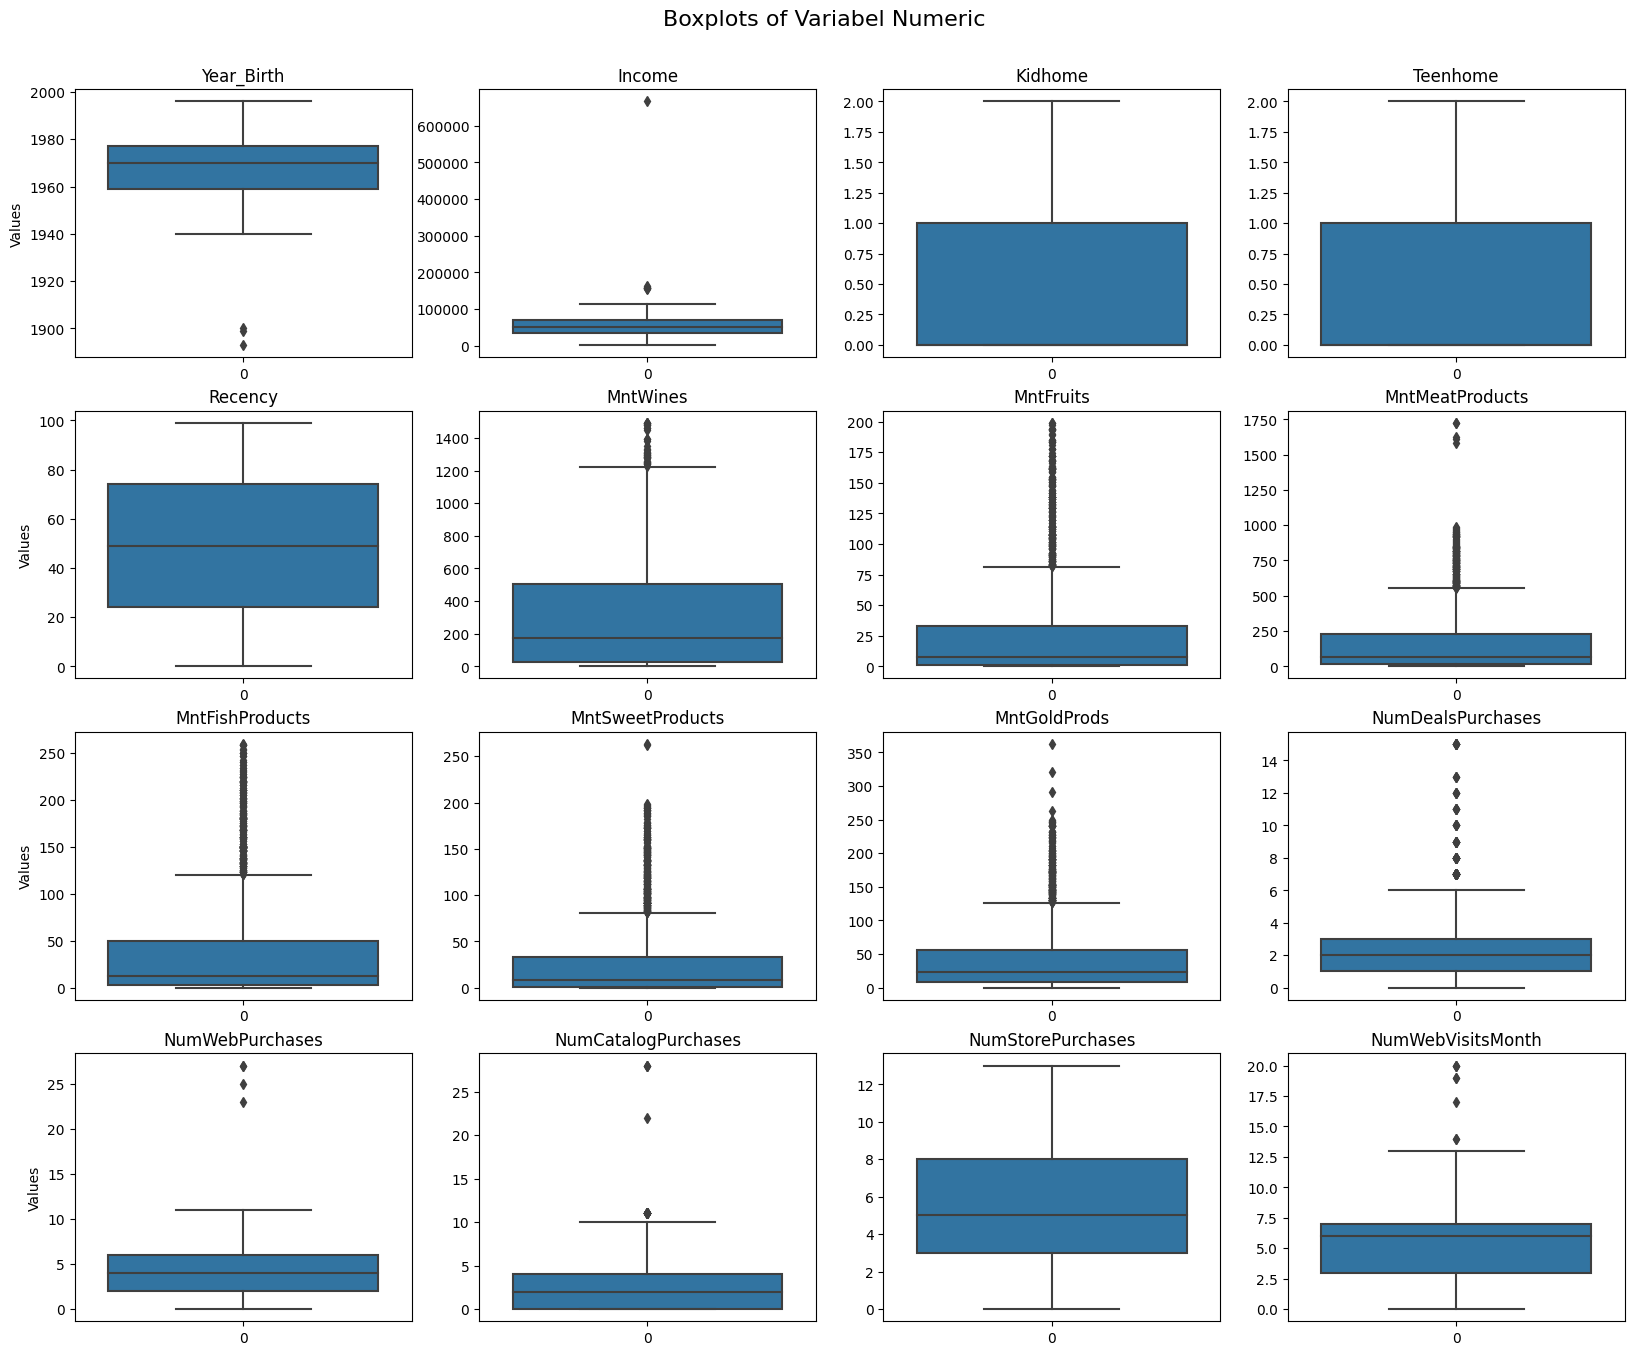

In [7]:
#check distribution of every numerical columns
numeric = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(data, columns_list, rows, cols, suptitle, size=(20, 16)):
    fig, axs = plt.subplots(rows, cols, figsize=size)
    fig.suptitle(suptitle, y=0.93, size=16)
    axs = axs.flatten()

    for i, data_column in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot(data=data[data_column], orient='v', ax=axs[i])
        axs[i].set_title(data_column)

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

# Call the function to create box plots
boxplots_custom(df, numeric, rows = 4, cols = 4, suptitle='Boxplots of Variabel Numeric')


### **1.1.Handling Zero ID**


In [8]:
df.loc[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,04/05/13,66,239,...,1,0,0,0,0,0,0,3,11,0


In [9]:
df['ID'].max()

11191

In [10]:
if (df['ID'] == 0).any():
    np.random.seed(42)
    random_number = np.random.randint(low=1, high=10000)
    df['ID'] = np.where(df['ID'] == 0, random_number, df['ID'])

df.loc[df['ID'] == random_number]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,7271,1985,Graduation,Married,70951.0,0,0,04/05/13,66,239,...,1,0,0,0,0,0,0,3,11,0


### **1.2.Handling Duplicate**


In [11]:
#duplicate
df.duplicated().sum()

0

### **1.3.Handling Data Type**


In [12]:
# Convert 'Dt_Customer' column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] 

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **1.4 Change Value Marital Status**

marital status pada umumnya:
- Single
- Married
- Divorced
- Widow

Berdasarkan data set 
 - Alone, berjumlah 3. Diasumsikan bahwa alone merupakan penyebutan lain dari single.
 - Absurd, berjumlah 2. Diasumsikan bahwa absurd sebagai tidak memiliki kejelasan hubungan, sehingga dianggap single.
 - YOLO, berjumlah 2. Diasumsikan bahwa YOLO sebagai tidak ingin berkomitmen ,sehingga dianggap single.

Referensi bisa di akses [Click here](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=61748&CVD=61748&CLV=0&MLV=1&D=1)

In [14]:
df[(df['Marital_Status'] == 'Alone') | (df['Marital_Status'] == 'Absurd')| (df['Marital_Status'] == 'YOLO')]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-10-03,42,534,...,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,...,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-10-01,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


In [15]:
# mengganti nilai yang belum sama pada baris sesuai ketentuan
df['Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single',
                                           'Absurd': 'Single',
                                           'YOLO' : 'Single',
                                           'Together' : 'Married'})

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

### **1.5 Change Value Education**

Perbedaan key antara tingkat pendidikan sarjana, pascasarjana, dan doktoral adalah:
<br>

Sarjana (Undergraduate):
- **Tingkat:** Pendidikan sarjana adalah tingkat pendidikan formal pertama setelah lulus SMA.
- **Degrees:** Awards a Bachelor's degree, B.A. (Bachelor of Arts) or B.S. (Bachelor of Science).

Pascasarjana (Master/postgraduate):
- **Tingkat:** Pendidikan pascasarjana mengikuti pendidikan sarjana dan juga disebut sebagai pendidikan tingkat lanjut.
- **Degrees:** Awards a Master's degree,  M.A. (Master of Arts) or M.S. (Master of Science).
- **2n Cycle:** Di Negara berbahasa Perancis, istilah "2n Cycle"  digunakan sebagai alternatif untuk postgraduate.

Doktoral (Ph.D.):
- **Tingkat**: Tingkat pendidikan formal tertinggi, sering dianggap sebagai pendidikan pascasarjana atau tingkat lanjut.
- **Degrees:** Awards a Ph.D. (Doctor of Philosophy)

international education levels:

- Primary Education: Elementary Education (TK - SD)
- Secondary Education: Middle School and High School (SD - SMA)
- Tertiary Education: Undergraduate, Postgraduate, and Doctoral Education (S1- S3)
<br>

Berdasarkan international education levels, label **Basic** dapat dipertimbangkan diubah menjadi label **High School** (Secondary Education), karena memiliki rentang paling dekat dengan label lainnya, yang tergolong kedalam Tertiary Education.


In [17]:

# mengganti nilai yang belum sama pada baris sesuai ketentuan
df['Education'] = df['Education'].replace({'2n Cycle':'Postgraduate',
                                           'Basic': 'High School',
                                           'Graduation' : 'Undergraduate',
                                           'PhD' : 'Doctoral',
                                           'Master' : 'Postgraduate'})


General estimates for when someone in the United States and Europe might complete various levels of education are as follows:

**High School Graduation Age:**
<br>
United States: Typically, high school graduates in the U.S. are around the age of 17-19.
<br>
Europe: Students in Europe will generally complete their secondary education at around the age of 18-19.

**Bachelor's Degree (Undergraduate):**
<br>
United States: Typically around the age of 22-23 after completing a four-year bachelor's degree program.
<br>
Europe: It varies depending on the country and program, but generally falls within the range of 21-24 years of age.

**Master's Degree (Postgraduate):**
<br>
United States: After earning a bachelor's degree, someone may pursue a master's degree, which can take an additional 1-2 years or more. Therefore, it's usually around the age of 23-25 or more after earning a bachelor's degree.
<br>
Europe: Master's programs in Europe often last 1-2 years, so the age range might be approximately 22-26.

**Doctoral Degree (Ph.D.):**
<br>
United States: Doctoral programs can take around 4-7 years after completing a bachelor's degree. Consequently, someone typically completes their Ph.D. at around the age of 27 or older.
<br>
Europe: Doctoral programs in Europe are usually shorter than in the United States, lasting around 3-4 years, so an age range of approximately 25-30 is more common.

In [18]:
df = df.rename(columns={'Education' : 'Education_Level'})


### **1.6.Handling Missing Values**


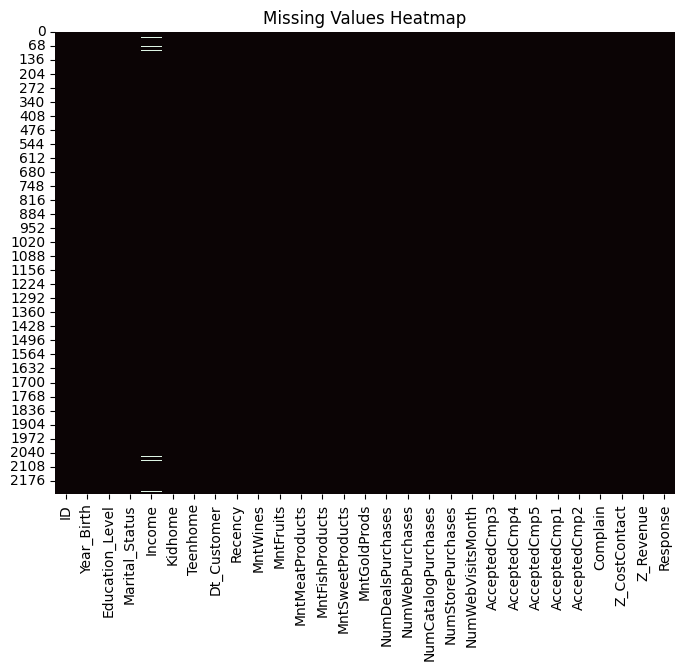

In [19]:
#missing value
missing_values =df.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(missing_values, cbar=False, cmap='mako')
plt.title('Missing Values Heatmap')
plt.show()

interval columns not set, guessing: ['Year_Birth', 'Income']


Text(0.5, 1.0, 'Phik Correlation Heatmap')

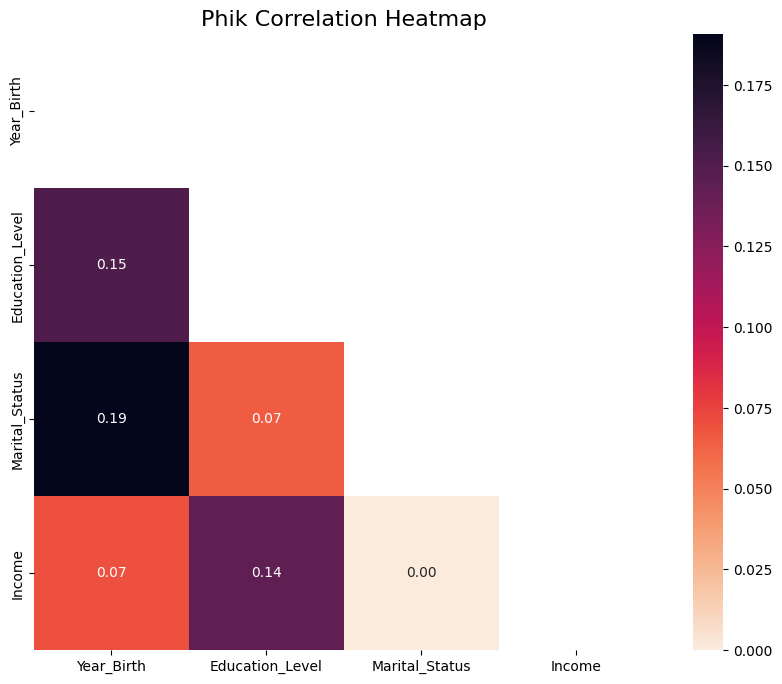

In [20]:
heatmap_data = df[['Year_Birth','Education_Level', 'Marital_Status','Income']]
phik_corr_matrix = heatmap_data.phik_matrix()

# Set up the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(phik_corr_matrix, dtype=bool))  # This creates a mask for the upper triangle
sns.heatmap(phik_corr_matrix, cmap='rocket_r', annot=True, fmt='.2f', cbar=True, mask=mask)

plt.title('Phik Correlation Heatmap', fontsize=16)

Here's a standard guideline for interpreting the strength of positive correlations:

- Strong Positive Correlation (r > 0.7):
When the correlation coefficient (r) is greater than 0.7, it indicates a strong positive correlation.

- Moderate Positive Correlation (0.3 ≤ r ≤ 0.7):
A correlation coefficient in the range of 0.3 to 0.7 suggests a moderate positive correlation.

- Weak Positive Correlation (0.1 ≤ r < 0.3):
When the correlation coefficient falls within the range of 0.1 to 0.3 it signifies a weak positive correlation.

<br>
Interpretation:

1. `Year_Birth` & `Income`:
- Terdapat korelasi positif antara tahun kelahiran dan pendapatan, yang mengindikasikan bahwa, secara umum, semakin muda usia seseorang, maka pendapatannya cenderung sedikit lebih tinggi.
- Koefisien korelasi sebesar 0,07 menunjukkan hubungan yang `lemah`. Hal ini mengindikasikan bahwa meskipun ada kaitan antara tahun kelahiran dan pendapatan, banyak faktor lain yang memengaruhi pendapatan, dan tahun kelahiran saja tidak menjelaskan sebagian besar variasi pendapatan.
2. `Year_Birth` & `Marital_Status`:
- Terdapat korelasi positif antara tahun kelahiran dan status pernikahan.
- Koefisien korelasi sebesar 0,19 cukup rendah, menunjukkan hubungan yang `lemah` antara tahun kelahiran dan status pernikahan.
3. `Year_Birth` & `Education_Level`:
- Terdapat korelasi positif antara tahun kelahiran dan tingkat pendidikan, yang mengindikasikan bahwa, secara umum, semakin muda usia seseorang, maka tingkat pendidikannya cenderung sedikit lebih tinggi.
- Koefisien korelasi sebesar 0,15 cukup rendah, menunjukkan hubungan yang `lemah` antara kedua variabel ini.
4. `Education_Level` & `Income`:
- Terdapat korelasi positif antara tingkat pendidikan dan pendapatan, yang mengindikasikan bahwa, secara umum, semakin tinggi tingkat pendidikan seseorang, maka pendapatannya cenderung sedikit lebih tinggi.
- Koefisien korelasi sebesar 0,14 mengindikasikan hubungan yang `sedang` antara tingkat pendidikan dan pendapatan.
5. `Education_Level` & `Marital_Status`:
- Terdapat korelasi positif antara tingkat pendidikan dan status pernikahan, yang mengindikasikan bahwa, secara umum, semakin tinggi tingkat pendidikan seseorang, maka status pernikahannya cenderung sedikit lebih tinggi.
- Koefisien korelasi sebesar 0,07 menunjukkan hubungan yang `lemah` antara kedua variabel ini.
6. `Marital_Status` & `Income`:
- Terdapat korelasi positif antara status pernikahan dan pendapatan, dengan koefisien korelasi sebesar 0,00.
- Koefisien korelasi sebesar 0,00 mengindikasikan hubungan yang sangat `lemah` atau hampir tidak ada hubungan antara status pernikahan dan pendapatan. Hal ini menunjukkan bahwa pendapatan dipengaruhi oleh berbagai faktor lain, dan status pernikahan sendiri tidak secara signifikan menjelaskan variasi pendapatan.


In [21]:
# fill 'Income' based on 'Education_Level'
#This code will replace missing 'Income' values with the median income for their respective 'Education_Level' group. It's an effective way to impute missing values based on the education level of each individual.

df['Income'] = df.groupby('Education_Level')['Income'].transform(lambda x: x.fillna(x.median()))


In [22]:
df.Income.describe()


count      2240.000000
mean      52243.358259
std       25038.691673
min        1730.000000
25%       35538.750000
50%       51498.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [23]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education_Level        0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### **1.7 Handling Outliers**

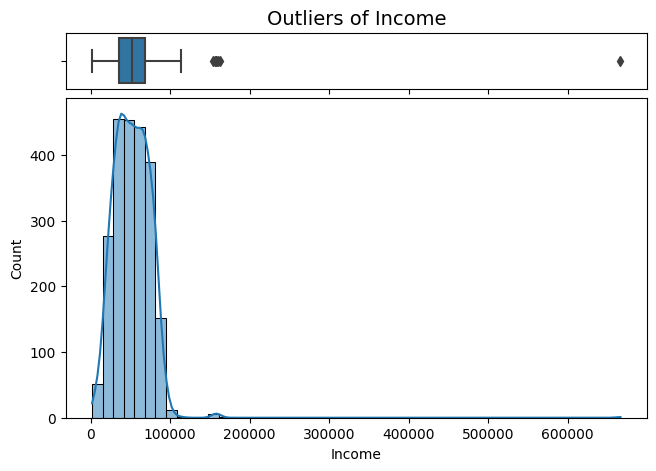

In [24]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})


ax1.set_title(f"Outliers of Income", color = "black", size = 14)
sns.boxplot(x = df['Income'], ax = ax1)
ax1.set(xlabel = "")

sns.set_palette('mako')
sns.histplot(data = df['Income'], ax = ax2, kde=True, bins=50)

plt.show()

In [25]:
df.Income.describe()


count      2240.000000
mean      52243.358259
std       25038.691673
min        1730.000000
25%       35538.750000
50%       51498.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [26]:
df[df['Income'] == df['Income'].max()]
df = df.drop(df[df['Income'] == df['Income'].max()].index)

## **2 Data Preparations**

### **2.1 Rename Value Of Products**

In [27]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education_Level',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [28]:
df.rename(columns={ 'MntFishProducts': 'MntFish',
 'MntGoldProds': 'MntGold',
 'MntMeatProducts': 'MntMeat' ,
 'MntSweetProducts': 'MntSweet',
 'Response' : 'AcceptedCmp6'}, inplace=True)


### **2.2 Drop Columns**

In [29]:
df = df.drop(columns='Z_CostContact')
df

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,AcceptedCmp6
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,11,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,11,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,11,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,11,0
4,5324,1981,Doctoral,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,11,0
2236,4001,1946,Doctoral,Married,64014.0,2,1,2014-10-06,56,406,...,5,7,0,0,0,1,0,0,11,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,11,0
2238,8235,1956,Postgraduate,Married,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,11,0


In [30]:
df = df.drop(columns='Z_Revenue')
df

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Doctoral,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Doctoral,Married,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Postgraduate,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


### **2.3 Add Columns**

In [31]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
latest_date = df['Dt_Customer'].max()
df['Age'] = latest_date.year - df['Year_Birth']
df



,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,Doctoral,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,47
2236,4001,1946,Doctoral,Married,64014.0,2,1,2014-10-06,56,406,...,5,7,0,0,0,1,0,0,0,68
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,33
2238,8235,1956,Postgraduate,Married,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,58


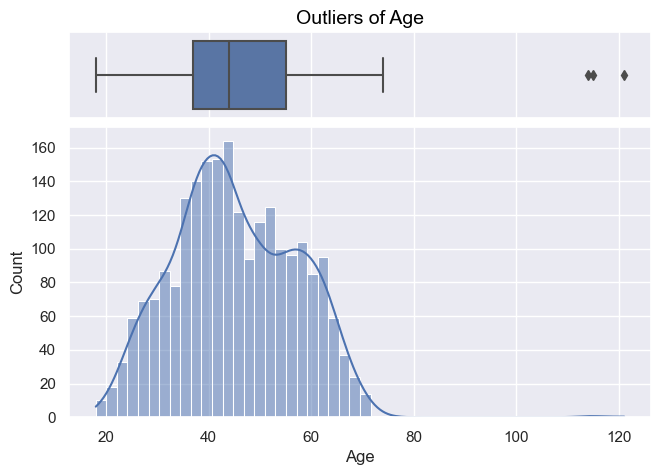

In [32]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.25, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Outliers of Age", color = "black", size = 14)
sns.boxplot(x = df['Age'], ax = ax1)
ax1.set(xlabel = "")

sns.histplot(data = df['Age'], ax = ax2, kde=True, bins=50)

plt.show()

In [33]:
df['Age'].describe()

count    2239.000000
mean       45.197856
std        11.985494
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [34]:
df[df['Age']> 100]

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age
192,7829,1900,Postgraduate,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,114
239,11004,1893,Postgraduate,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,121
339,1150,1899,Doctoral,Married,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,115


In [35]:
outlier_age = df[df['Age']> 100].index
df = df.drop(outlier_age)

In [36]:
df['Age'].describe()

count    2236.000000
mean       45.101968
std        11.703281
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

#### **2.5.1 Add Column Range Age**
<br>
To make easier to analyze we also create group for column age, based on the statcan we divided income Age 6 categories : the reference can be accessed [Click here](https://www.scribd.com/doc/151484440/Kategori-Umur-Menurut-Depkes-RI)

In [87]:
df['Age'].unique()

array([57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 31, 38, 55, 62, 27, 68, 34,
       65, 32, 35, 63, 45, 28, 25, 51, 44, 41, 71, 39, 18, 46, 50, 37, 36,
       59, 48, 26, 66, 56, 42, 54, 69, 23, 52, 61, 53, 58, 22, 24, 67, 21,
       20, 73, 70, 19, 74])

In [38]:
def range_age(Age):
    if 18 <= Age <= 25:
        return 'Teenage'
    elif 26 <= Age <= 35:
        return 'Young Adult'
    elif  36 <= Age <= 45:
        return 'Adult'
    elif 46 <= Age <= 55:
        return 'Middle-Aged'
    elif 56 <= Age <= 65:
        return 'Senior'
    else:
        return 'Elderly'

df['Age_Class'] = df['Age'].apply(range_age)
df[['Age_Class','Age']]

,Age_Class,Age
0,Senior,57
1,Senior,60
2,Middle-Aged,49
3,Young Adult,30
4,Young Adult,33
...,...,...
2235,Middle-Aged,47
2236,Elderly,68
2237,Young Adult,33
2238,Senior,58


#### **2.5.2 Add Column Number Of Family**

In [39]:
def Number_Family(row):
    marital_status = row['Marital_Status']
    kidhome = row['Kidhome']
    teenhome = row['Teenhome']
    
    if marital_status == 'Single':
        return 1 + kidhome + teenhome
    elif marital_status == 'Married':
        return 2 + kidhome + teenhome
    elif marital_status in ['Divorced', 'Widow']:
        return 1 + kidhome + teenhome
    else:
        return 0
df['Numfamily'] = df.apply(Number_Family, axis=1)

In [40]:
df[['Numfamily', 'Marital_Status']].head(10)


,Numfamily,Marital_Status
0,1,Single
1,3,Single
2,2,Married
3,3,Married
4,3,Married
5,3,Married
6,2,Divorced
7,3,Married
8,3,Married
9,4,Married


#### **2.5.3 Add Column Income categories**
<br>
To make easier to analyze we also create group for column income, based on the worldbank data we divided income into 4 categories : the reference can be accessed [Click here](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)

In [41]:
df.Income.describe()


count      2236.000000
mean      51958.006485
std       21412.400685
min        1730.000000
25%       35502.500000
50%       51445.500000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

In [42]:
def income_label(income):
    if  income <= 35502.5:
        return 'Lower'
    elif 35503 <= income <= 51373.0:
        return 'Lower-middle'
    elif 51374.0 <= income <= 68275.75:
        return 'Upper-Middle'
    else:
        return 'Upper'

df['Income_Level'] = df['Income'].apply(income_label)
df[['Income_Level','Income']]

,Income_Level,Income
0,Upper-Middle,58138.0
1,Lower-middle,46344.0
2,Upper,71613.0
3,Lower,26646.0
4,Upper-Middle,58293.0
...,...,...
2235,Upper-Middle,61223.0
2236,Upper-Middle,64014.0
2237,Upper-Middle,56981.0
2238,Upper,69245.0


#### **2.5.4 Add Column Total spent**

In [43]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeat'] + df['MntFish'] + df['MntSweet'] + df['MntGold']
df[['Total_Spent','ID']].sort_values(by='ID')

,Total_Spent,ID
822,577,1
1511,120,9
1654,32,13
1906,1028,17
768,183,20
...,...,...
93,32,11178
2132,8,11181
2183,69,11187
997,89,11188


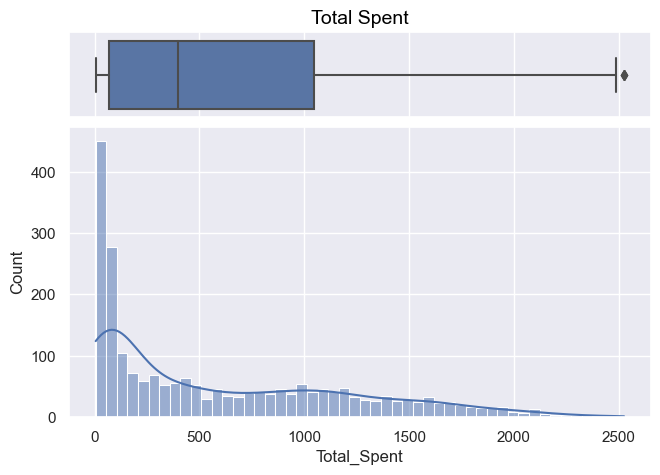

In [44]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.25, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Total Spent", color = "black", size = 14)
sns.boxplot(x = df['Total_Spent'], ax = ax1)
ax1.set(xlabel = "")

sns.histplot(data = df['Total_Spent'], ax = ax2, kde=True, bins=50)

plt.show()

In [45]:
df[df['Total_Spent'] >= 2500]

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Age_Class,Numfamily,Income_Level,Total_Spent
1179,5735,1991,Postgraduate,Single,90638.0,0,0,2014-02-13,29,1156,...,1,0,0,0,0,23,Teenage,1,Upper,2525
1492,1763,1988,Undergraduate,Married,87679.0,0,0,2013-07-27,62,1259,...,1,1,0,0,1,26,Young Adult,2,Upper,2524
1572,5350,1991,Postgraduate,Single,90638.0,0,0,2014-02-13,29,1156,...,1,0,0,0,1,23,Teenage,1,Upper,2525


#### **2.5.5 Add Column Total Purchase**

In [46]:
df['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df[['Total_Purchase','ID']].sort_values(by='ID')

,Total_Purchase,ID
822,17,1
1511,7,9
1654,4,13
1906,24,17
768,7,20
...,...,...
93,4,11178
2132,0,11181
2183,6,11187
997,6,11188


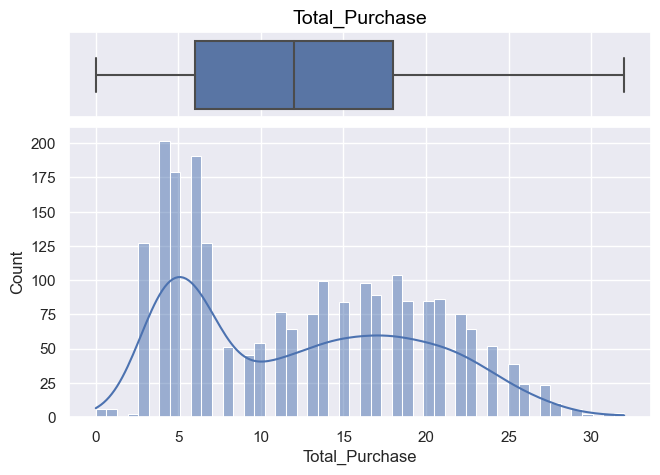

In [47]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.25, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Total_Purchase", color = "black", size = 14)
sns.boxplot(x = df['Total_Purchase'], ax = ax1)
ax1.set(xlabel = "")

sns.histplot(data = df['Total_Purchase'], ax = ax2, kde=True, bins=50)

plt.show()

In [48]:
df.describe()['Total_Purchase']

count    2236.000000
mean       12.546512
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
std         7.206577
Name: Total_Purchase, dtype: float64

In [49]:
df[df['Total_Purchase'] >= 30].head()

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Age_Class,Numfamily,Income_Level,Total_Spent,Total_Purchase
67,9369,1979,Postgraduate,Single,88194.0,0,1,2014-03-19,19,688,...,1,0,0,1,35,Young Adult,2,Upper,1274,31
412,7030,1955,Doctoral,Married,66465.0,0,1,2013-03-30,1,1200,...,1,0,0,0,59,Senior,3,Upper-Middle,1485,32
636,6945,1952,Undergraduate,Single,84574.0,0,0,2013-04-06,72,387,...,0,0,0,0,62,Senior,1,Upper,1375,31
646,4611,1970,Undergraduate,Married,105471.0,0,0,2013-01-21,36,1009,...,1,0,0,1,44,Adult,2,Upper,1724,30
1252,5153,1967,Doctoral,Married,77766.0,0,1,2013-02-22,97,1004,...,0,0,0,1,47,Middle-Aged,3,Upper,1529,32


#### **2.5.5 Add Column Total Campaigns**

In [50]:
df['Total_Camps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']+df['AcceptedCmp6']
df[['ID','Total_Camps']]

,ID,Total_Camps
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0
...,...,...
2235,10870,0
2236,4001,1
2237,7270,1
2238,8235,0


## **Cleaned Data**

In [51]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2236, 34)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.0,False,2236,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.0,False,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education_Level,object,0.0,False,4,"[Undergraduate, Doctoral, Postgraduate, High S..."
3,Marital_Status,object,0.0,False,4,"[Single, Married, Divorced, Widow]"
4,Income,float64,0.0,False,1971,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.0,False,3,"[0, 1, 2]"
6,Teenhome,int64,0.0,False,3,"[0, 1, 2]"
7,Dt_Customer,datetime64[ns],0.0,False,663,"[2012-04-09 00:00:00, 2014-08-03 00:00:00, 201..."
8,Recency,int64,0.0,False,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.0,False,775,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


In [52]:
df

,ID,Year_Birth,Education_Level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,AcceptedCmp6,Age,Age_Class,Numfamily,Income_Level,Total_Spent,Total_Purchase,Total_Camps
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,57,Senior,1,Upper-Middle,1617,22,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,60,Senior,3,Lower-middle,27,4,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,49,Middle-Aged,2,Upper,776,20,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-10-02,26,11,...,0,0,0,30,Young Adult,3,Lower,53,6,0
4,5324,1981,Doctoral,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,33,Young Adult,3,Upper-Middle,422,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,47,Middle-Aged,3,Upper-Middle,1341,16,0
2236,4001,1946,Doctoral,Married,64014.0,2,1,2014-10-06,56,406,...,0,0,0,68,Elderly,5,Upper-Middle,444,15,1
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,33,Young Adult,1,Upper-Middle,1241,18,1
2238,8235,1956,Postgraduate,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,58,Senior,3,Upper,843,21,0


In [86]:
#Exporting clean data set
xls_filename = 'Supermarket_Customer_Clean.xlsx'
df.to_excel('Supermarket_Customer_Clean.xlsx', index=False)

## **3.Data Analysis**
<br>
Setelah menyelesaikan proses pembersihan data, langkah selanjutnya adalah melakukan analisis data untuk menentukan kampanye paling sukses di antara kampanye 1 hingga 6 dan mengidentifikasi faktor-faktor yang memengaruhi kesuksesan kampanye-kampanye tersebut. Analisis ini akan membantu dalam membentuk strategi pemasaran yang dapat berkontribusi pada peningkatan jumlah anggota perusahaan.

### **3.1 Find The Best Campaign**

''

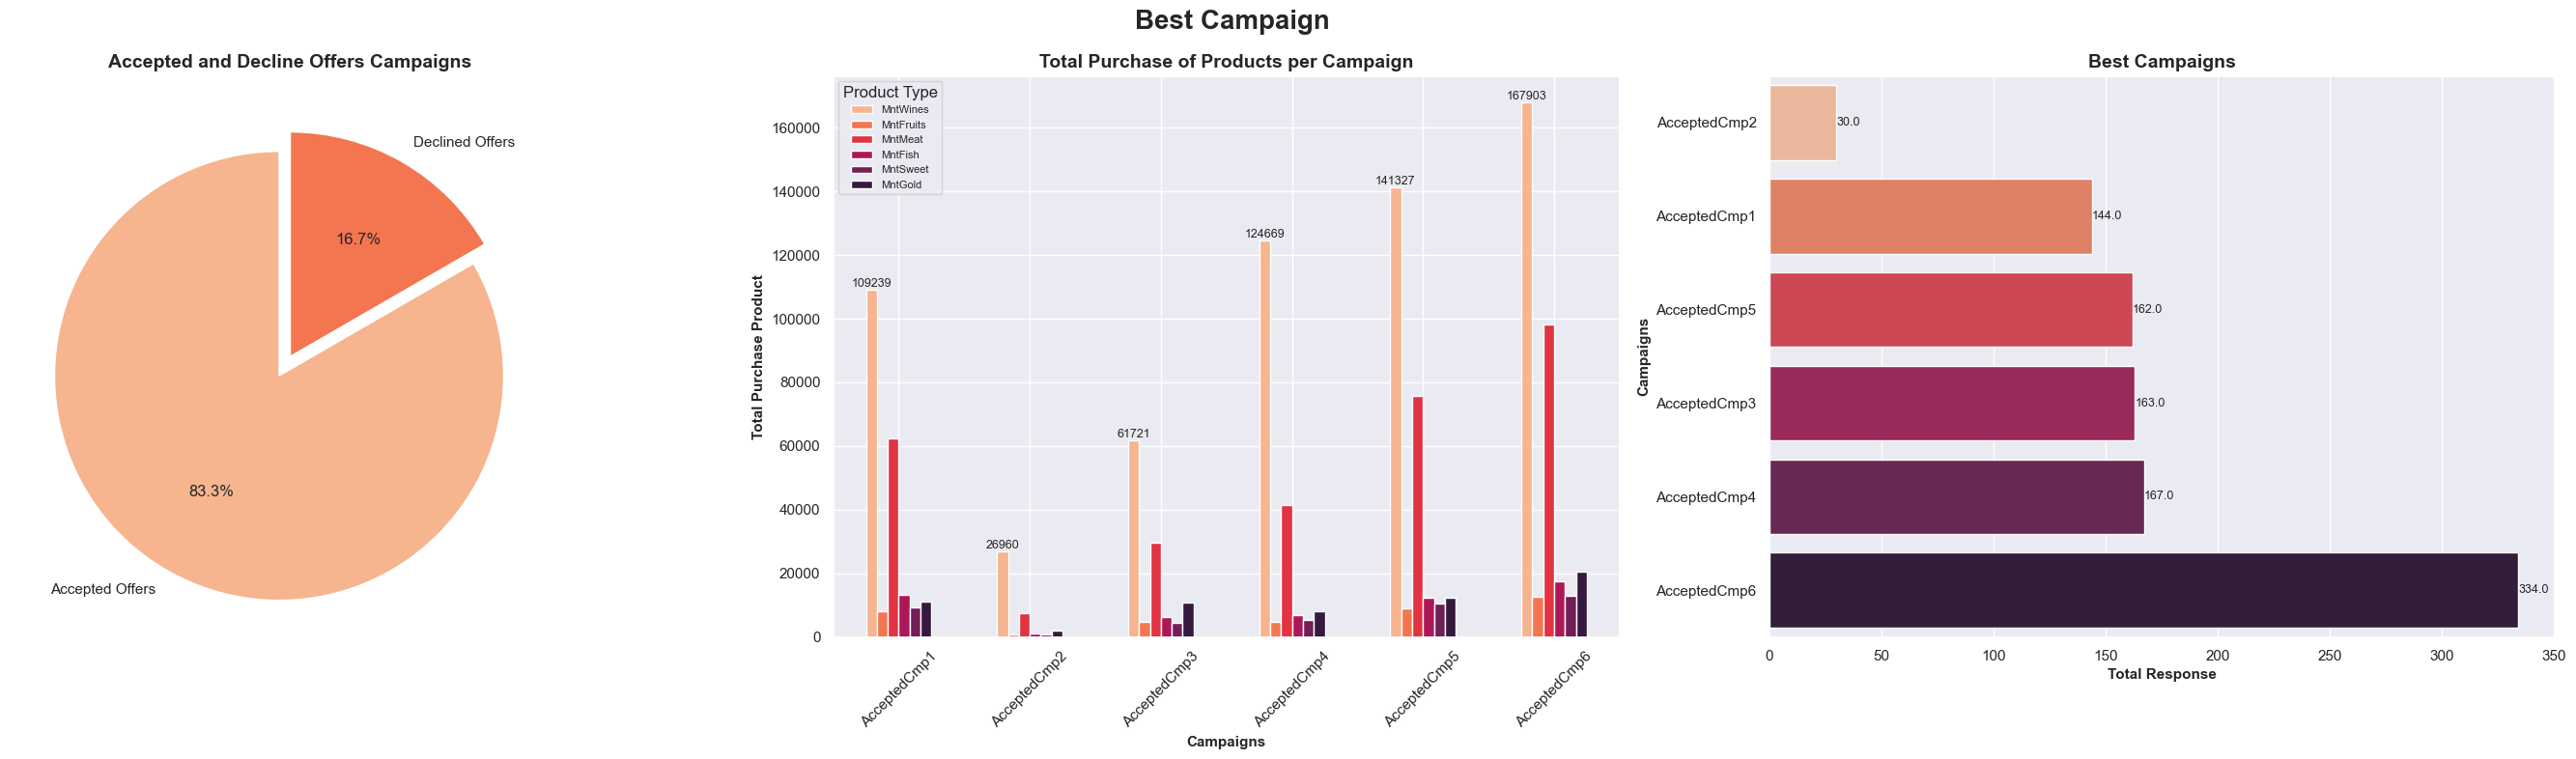

In [54]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp6']
products = [col for col in df if col.startswith('Mnt')]


# Create subplots
sns.set_palette("rocket_r")
fig, axes = plt.subplots(1,3, figsize=(28, 8))

# Subplot 1: Campaign Responses
responses = df[campaigns].sum().sort_values()
ax1 = sns.barplot(x=responses, y=responses.index, palette='rocket_r', ax=axes[2])

container = ax1.containers[0]
ax1.bar_label(container, [x for x in container.datavalues], size = 9)

ax1.set_ylabel('Campaigns', size=11, fontweight='bold')
ax1.set_xlabel('Total Response', size=11, fontweight='bold')
ax1.set_title('Best Campaigns', size=14, fontweight='bold')


# Subplot 2: Total Purchase of Products per Campaign
Acc_Cmps = [campaign for campaign in campaigns if df[campaign].sum() >=1]
campaign_purchase_df = pd.DataFrame()

for column in Acc_Cmps:
    campaign_accepted = df[df[column] == 1]
    total_purchase = campaign_accepted[products].sum()
    campaign_purchase_df[column] = total_purchase

# Transpose the DataFrame
campaign_purchase_df = campaign_purchase_df.T

# Create the bar plot
ax2= campaign_purchase_df.plot(kind='bar', ax=axes[1], rot=45)
container = ax2.containers[0]
ax2.bar_label(container, [x for x in container.datavalues], size = 9)

ax2.set_xlabel('Campaigns', size=11, fontweight='bold')
ax2.set_ylabel('Total Purchase Product', size=11, fontweight='bold')
ax2.set_title('Total Purchase of Products per Campaign', size=14, fontweight='bold')
ax2.legend(title='Product Type', fontsize=8)


# Subplot 3: Percentage of Accepted and Decline Offers Campaigns
total_camps = df['Total_Camps'].value_counts()
Acc = (total_camps.index >= 1).sum()
Dec = (total_camps.index == 0).sum()
percent_camps = [Acc, Dec]

ax3 = axes[0]
ax3.pie(percent_camps, labels=['Accepted Offers', 'Declined Offers'], autopct='%1.1f%%', startangle=90, explode=[0.1,0])
ax3.set_title('Accepted and Decline Offers Campaigns', size=14, fontweight='bold')

plt.suptitle('Best Campaign', size = 20, fontweight='bold')
plt.tight_layout()
;

**Best Campaign**

Berdasarkan respons terhadap kampanye 1-6, ditemukan bahwa `kampanye terbaik adalah kampanye 6`, dengan total respons sebanyak 334, diikuti oleh kampanye 4 dengan 167 respons, dan kampanye 1 dengan 144 respons, sementara terdapat perbedaan signifikan pada kampanye 2 hanya dengan 30 respons.

**Total Purchase per Campaign**

Hasil ini memberikan informasi tentang kategori produk mana yang lebih populer atau berhasil dalam berbagai kampanye pemasaran.
<br>
1. `Wine`: Wine secara konsisten memiliki total pembelian tertinggi di semua kampanye, menunjukkan popularitasnya di kalangan pelanggan yang merespons tawaran kampanye.

2. `Daging`: Daging adalah kategori produk terlaris kedua di semua kampanye, menunjukkan daya tariknya bagi pelanggan yang merespons kampanye, meskipun memiliki penjualan sedikit lebih rendah dibandingkan Wine.

3. `Buah-buahan`: Pembelian buah-buahan bervariasi antar kampanye. Tidak ada penjualan buah dalam kampanye 2, dan total pembelian buah tertinggi terjadi dalam kampanye 1 dan 5.

4. `Ikan`: Total pembelian ikan berfluktuasi antar kampanye. Kampanye 1 dan 5 memiliki total pembelian ikan yang sama, sementara kampanye 3 dan 4 juga menunjukkan tingkat total pembelian yang sama. Sebaliknya, kampanye 2 memiliki pembelian ikan yang paling rendah.

5. `Permen`: Mirip dengan ikan, total pembelian permen bervariasi antar kampanye. Kampanye 2 memiliki penjualan permen terendah, sementara kampanye 1 dan 5 memiliki total pembelian tertinggi untuk kategori produk ini.

6. `Emas`: Penjualan produk emas fluktuatif, tanpa tren khusus yang teramati. Kampanye 2 memiliki total pembelian emas terendah, sementara kampanye 3 memiliki total pembelian tertinggi.

Dengan memahami performa produk dalam setiap kampanye, tim pemasaran dapat mengambil keputusan yang terinformasi untuk mengoptimalkan strategi promosi mereka, meningkatkan pengelompokan produk, dan memaksimalkan penjualan di berbagai kampanye. Selain itu, pemantauan dan penyesuaian terus-menerus strategi berdasarkan data kampanye akan menjadi penting untuk kesuksesan jangka panjang.

**Accepted and Decline Offers Campaigns**

Fakta bahwa 83,3% kampanye diterima menunjukkan bahwa sebagian besar upaya pemasaran Anda berhasil dalam hal respons pelanggan. Tingkat penerimaan yang tinggi ini mungkin menunjukkan strategi kampanye atau targeting yang efektif. Memahami nuansa ini dapat membantu menyesuaikan kampanye dengan lebih efektif.

### **3.2 Relationship Between Columns**


Analyzing the correlation or relationships between columns in a dataset can be valuable in understanding the data and extracting insights. 
A heatmap can quickly highlight strong positive or negative correlations between pairs of columns. This can help identify which variables tend to move together or in opposite directions.

In [55]:
df.select_dtypes(include='object').columns

Index(['Education_Level', 'Marital_Status', 'Age_Class', 'Income_Level'], dtype='object')

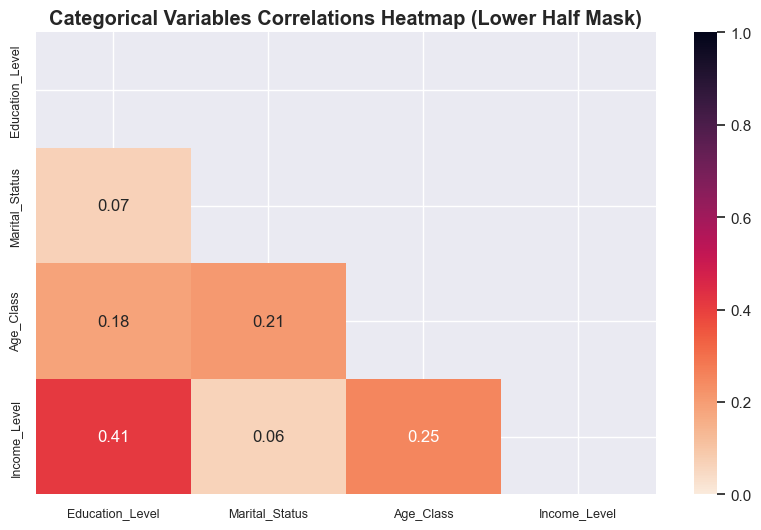

In [56]:

# Select the relevant categorical columns
categorical_corr = ["Education_Level", "Marital_Status", "Age_Class","Income_Level"]
dfCorrMap = df[categorical_corr]

# Calculate the phik matrix for categorical correlation
phik_overview = dfCorrMap.phik_matrix()

corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))

# Create the heatmap of variable correlation
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(phik_overview, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="rocket_r", fmt='.2f', annot_kws={"fontsize": 12})
sns.set(font_scale=1.2)
plt.title("Categorical Variables Correlations Heatmap (Lower Half Mask)",fontweight='bold')
plt.xticks(size=9)
plt.yticks(size=9)

plt.show()

> Hasil analisis korelasi antara variabel kategorikal menyediakan wawasan yang berguna tentang hubungan antara variabel-variabel.

**1. Korelasi antara `Education Level` dan `Income Level` (0.41):**
- Analisis ini menunjukkan bahwa ada hubungan positif yang sedang antara tingkat pendidikan dan tingkat pendapatan. Ini berarti individu dengan tingkat pendidikan yang lebih tinggi cenderung memiliki pendapatan yang lebih tinggi.
- Relevansinya dengan kampanye pemasaran: Ini menunjukkan bahwa faktor pendidikan dapat memengaruhi kesuksesan kampanye. Misalnya, kampanye yang menargetkan pelanggan dengan tingkat pendidikan yang lebih tinggi mungkin memiliki potensi untuk menghasilkan pendapatan lebih tinggi. 

**2. Korelasi antara` Education Level` dan `Age Class` (0.18):**
- Korelasi yang lemah antara tingkat pendidikan dan kelompok usia menunjukkan bahwa ada sedikit hubungan antara dua faktor ini.
- Relevansinya dengan kampanye pemasaran: Hubungan yang lemah ini mungkin tidak memiliki dampak besar pada kesuksesan kampanye, tetapi masih dapat digunakan untuk memahami karakteristik demografis pelanggan.

**3. Korelasi antara` Education Level` dan `Marital Status` (0.07):**
- Korelasi yang sangat lemah antara tingkat pendidikan dan status perkawinan menunjukkan bahwa kedua faktor ini kurang berkaitan.
- Relevansinya dengan kampanye pemasaran: Status perkawinan mungkin tidak terlalu memengaruhi respons kampanye, setidaknya dalam hubungannya dengan tingkat pendidikan.

**4. Korelasi antara `Marital Status` dan `Income Level` (0.06):**
- Korelasi yang sangat lemah antara status perkawinan dan tingkat pendapatan menunjukkan bahwa status perkawinan tidak memiliki pengaruh besar pada pendapatan.
- Relevansinya dengan kampanye pemasaran: Kampanye mungkin perlu lebih fokus pada faktor-faktor lain daripada status perkawinan untuk meningkatkan pendapatan.

**5. Korelasi antara `Marital Status` dan `Age Class` (0.21):**
- Korelasi sedang antara status perkawinan dan kelompok usia menunjukkan bahwa status perkawinan berkaitan dengan kelompok usia tertentu.
- Relevansinya dengan kampanye pemasaran: Kampanye dapat lebih efektif jika mempertimbangkan status perkawinan dalam konteks kelompok usia tertentu.

**6. Korelasi antara `Age Class` dan `Income Level` (0.25):**
- Korelasi positif antara kelompok usia dan tingkat pendapatan menunjukkan bahwa usia dapat memengaruhi pendapatan. Semakin tua usia, pendapatan cenderung lebih tinggi.
- Relevansinya dengan kampanye pemasaran: Kampanye mungkin perlu menyesuaikan strategi berdasarkan kelompok usia untuk meningkatkan pendapatan.

In [57]:
df.select_dtypes(include='number').columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Age', 'Numfamily', 'Total_Spent',
       'Total_Purchase', 'Total_Camps'],
      dtype='object')

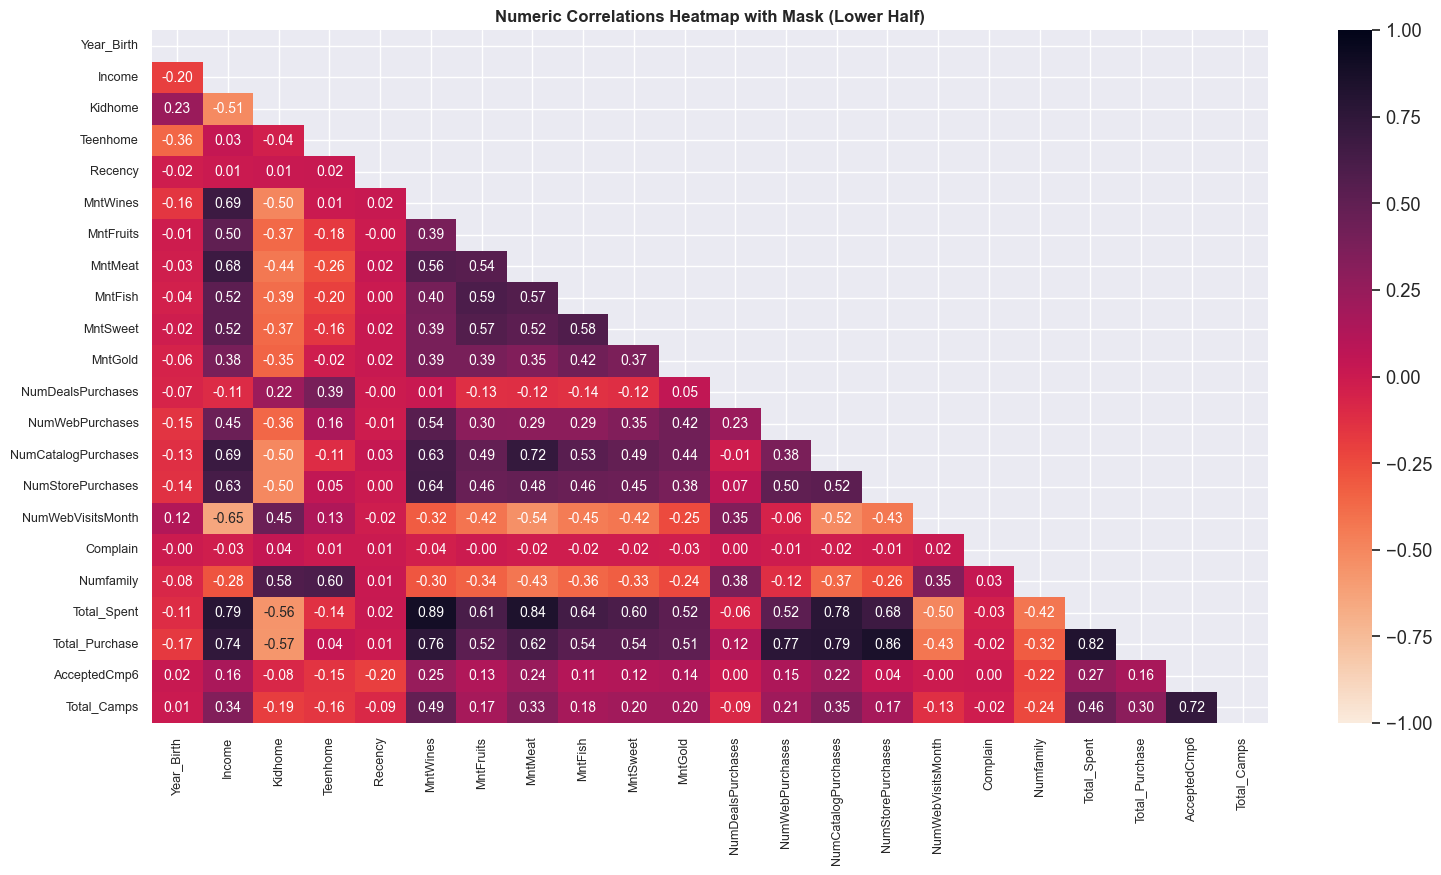

In [58]:
Numeric_col = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Numfamily', 'Total_Spent',
       'Total_Purchase', 'AcceptedCmp6', 'Total_Camps']

# Calculate the correlation matrix
Numeric_df = df[Numeric_col]
correlation_matrix = Numeric_df.corr()

# Create a mask to hide the upper half of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(18, 9))

# Create the heatmap with the mask and adjust the annotation font size
sns.heatmap(correlation_matrix, cmap='rocket_r', annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, annot_kws={'size': 10})

plt.title('Numeric Correlations Heatmap with Mask (Lower Half)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

**Korelasi `Income` & `Total Spent` (0.79):**
* Korelasi positif yang kuat (0.79) antara pendapatan dan total pengeluaran menunjukkan bahwa ada hubungan yang kuat antara pendapatan pelanggan dan seberapa banyak mereka menghabiskan. Pelanggan dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak.

**Korelaso`Income` & `Total Purchase` (0.74):**
* Korelasi positif yang kuat (0.74) antara pendapatan dan total pembelian menunjukkan bahwa pendapatan pelanggan memiliki pengaruh yang signifikan pada jumlah total pembelian. Pelanggan dengan pendapatan lebih tinggi cenderung melakukan pembelian yang lebih besar.

**Korelasi `Kidhome` & `NumFamily `(0.58):**
* Korelasi positif yang kuat (0.58) antara jumlah anak di rumah (Kidhome) dan jumlah anggota keluarga (NumFamily) menunjukkan bahwa rumah tangga dengan lebih banyak anak cenderung memiliki lebih banyak anggota keluarga. Ini bisa berarti bahwa rumah tangga dengan anak cenderung lebih besar.

**Korelasi `Kidhome` & `NumWebVisitsMonth` (0.45):**
* Korelasi positif (0.45) antara jumlah anak di rumah (Kidhome) dan jumlah kunjungan ke situs web dalam sebulan menunjukkan bahwa rumah tangga dengan anak cenderung lebih sering mengunjungi situs web dalam sebulan.

**Korelasi `Teenhome` & `NumDealsPurchases` (0.39):**
* Korelasi positif (0.39) antara jumlah remaja di rumah (Teenhome) dan jumlah pembelian dengan diskon menunjukkan bahwa rumah tangga dengan remaja cenderung melakukan lebih banyak pembelian dengan diskon.

**Korelasi `MntWines` & `Total Purchase` (0.76):**
* Korelasi positif yang kuat (0.76) antara pengeluaran untuk anggur (MntWines) dan total pembelian menunjukkan bahwa pengeluaran untuk anggur memiliki pengaruh positif yang signifikan pada total pembelian. Pelanggan yang menghabiskan lebih banyak untuk anggur cenderung memiliki total pembelian yang lebih besar.

**Korelasi `MntWines` & `Total Spent` (0.89):**
* Korelasi positif yang kuat (0.89) antara pengeluaran untuk anggur (MntWines) dan total pengeluaran menunjukkan bahwa pengeluaran untuk anggur memiliki pengaruh positif yang signifikan pada total pengeluaran. Pelanggan yang menghabiskan lebih banyak untuk anggur juga menghabiskan lebih banyak secara keseluruhan.

**Korelasi `NumCatalogPurchases` & `MntMeat` (0.72):**
* Korelasi positif yang kuat (0.72) antara jumlah pembelian melalui katalog (NumCatalogPurchases) dan pengeluaran untuk daging (MntMeat) menunjukkan bahwa pembelian melalui katalog berkaitan dengan pengeluaran untuk daging. Pelanggan yang lebih sering melakukan pembelian melalui katalog mungkin juga lebih cenderung menghabiskan lebih banyak untuk daging.


### **3.3 Customer Segmentation for Best Campaign**

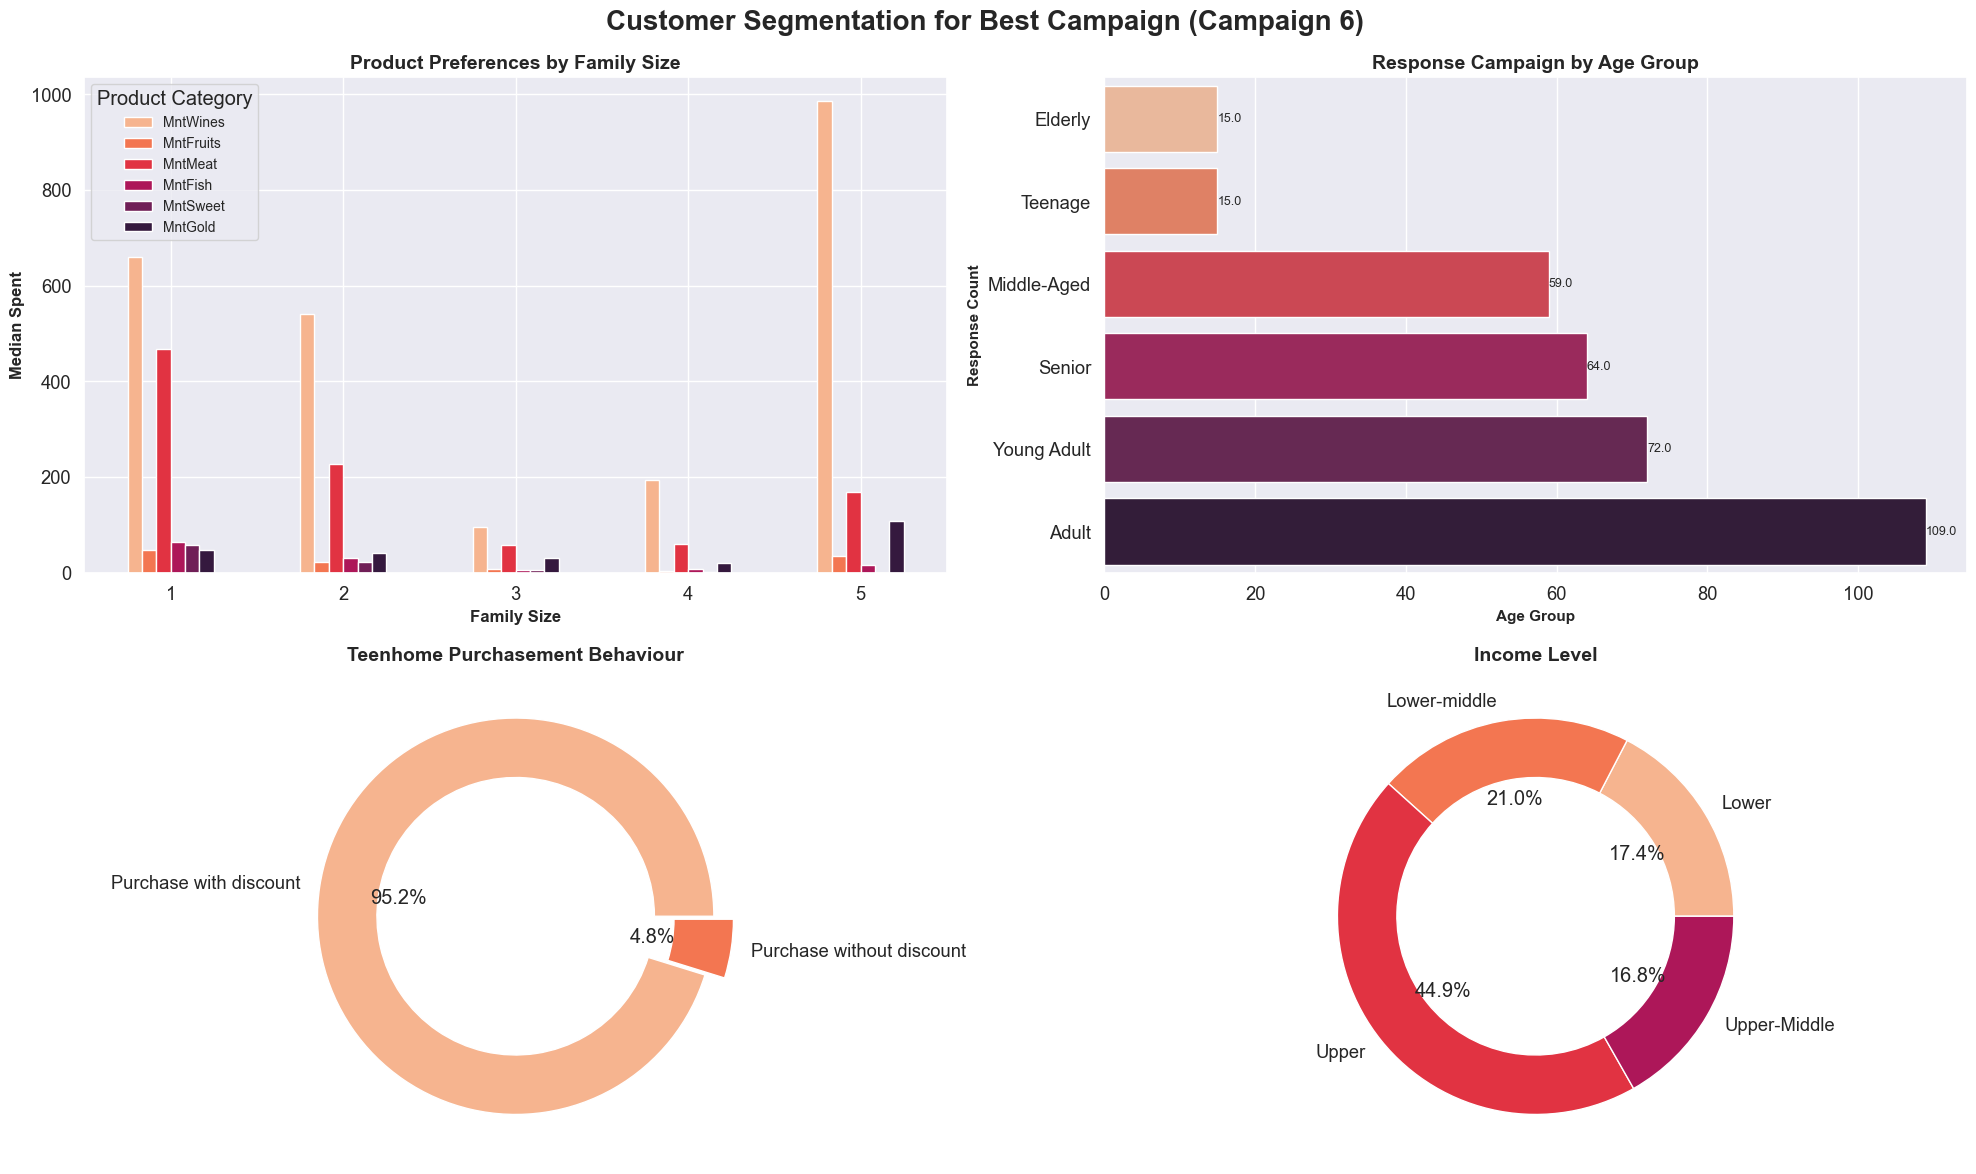

In [59]:
sns.set_palette("rocket_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Filter
accepted_campaign6 = df[df['AcceptedCmp6'] == 1]

# Subplot 1: Product Preferences by Family Size
fam_reference = accepted_campaign6.groupby('Numfamily')[['MntWines', 'MntFruits', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold']].median()

product_categories = fam_reference.columns
ax1 = fam_reference.plot(kind='bar', ax=axes[0, 0])
ax1.set_xlabel('Family Size', size=12, fontweight='bold')
ax1.set_ylabel('Median Spent', size=12, fontweight='bold')
ax1.set_title('Product Preferences by Family Size', size=14, fontweight='bold')
ax1.legend(title='Product Category', fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


# Subplot 2: Spent in Best Campaign by Age
age_class_max = accepted_campaign6.groupby('Age_Class').size().sort_values()
ax2 = sns.barplot(x=age_class_max.values, y=age_class_max.index, palette='rocket_r', ax=axes[0, 1])
container = ax2.containers[0]
ax2.bar_label(container, [x for x in container.datavalues], size=9)
ax2.set_title('Response Campaign by Age Group', size=14, fontweight='bold')
ax2.set_xlabel('Age Group', size=11, fontweight='bold')
ax2.set_ylabel('Response Count', size=11, fontweight='bold')

# Subplot 3: Teenhome Purchasement Behaviour

total_teens = len(accepted_campaign6)
teens_with_deals = len(accepted_campaign6[accepted_campaign6['NumDealsPurchases'] >= 1])
teens_without_deals = total_teens - teens_with_deals

percent_with_deals = (teens_with_deals / total_teens) * 100
percent_without_deals = (teens_without_deals / total_teens) * 100

ax3 = axes[1, 0]
ax3.pie(x=[percent_with_deals, percent_without_deals], labels=['Purchase with discount', 'Purchase without discount'], autopct='%1.1f%%', wedgeprops={'width': 0.3}, explode=[0,0.1])
ax3.set_title('Teenhome Purchasement Behaviour', size=14, fontweight='bold')

# Subplot 4: income level
income_level = accepted_campaign6.groupby('Income_Level').size()
max_income = income_level.idxmax()

ax4 = axes[1,1]
ax4.pie(x=income_level, labels=income_level.index, autopct='%1.1f%%', wedgeprops={'width': 0.3,})
ax4.set_title('Income Level',  size=14, fontweight='bold')

plt.suptitle('Customer Segmentation for Best Campaign (Campaign 6) ', size=20, fontweight='bold')
plt.tight_layout()
plt.show()


**Product Preference by Family Size**
<br>
preferensi produk berdasarkan ukuran keluarga (Numfamily). Berikut adalah analisis yang dapat dibuat berdasarkan data ini:
1. Dapat dilihat bahwa keluarga dengan `jumlah anggota 1 atau 5` memiliki `preferensi` yang lebih besar terhadap `pembelian anggur (MntWines)` dibandingkan dengan keluarga dengan jumlah anggota lainnyadan 5, cenderung membeli lebih banyak anggur dibandingkan dengan keluarga berukuran 2, 3, atau 4.
2. Keluarga dengan `jumlah anggota 1` juga cenderung lebih suka membeli `daging (MntMeat)`.
3. Keluarga dengan `jumlah anggota 3 dan 4` lebih suka membeli produk `emas (MntGold)`.
4. Produk `buah-buahan (MntFruits)` cenderung `tidak menjadi preferensi` yang dominan untuk keluarga dengan jumlah anggota tertentu.

Jumlah anggota dalam keluarga dapat memengaruhi preferensi pembelian produk tertentu. Ini mungkin disebabkan oleh preferensi individu dalam keluarga atau kebutuhan makanan sehari-hari.

**Response Campaign By Age Group**
<br>
- Kelompok usia `Adult` (Dewasa) memiliki 109 respons campaign, jumlah tertinggi di antara semua kelompok usia. Respons yang tinggi dari kelompok usia ini dapat dijelaskan oleh pendapatan yang lebih stabil, kemampuan untuk mengambil keputusan pembelian yang signifikan, dan minat terhadap penawaran kampanye.

**Teenhome Purchasement Behaviour**
<br>
- Dalam campaign 6, sebanyak 95,2% `pembelian dengan diskon` (NumDealsPurchases) dilakukan oleh rumah tangga yang memiliki `remaja` (Teenhome). Artinya, mayoritas pembelian dengan diskon dalam kampanye ini berasal dari rumah tangga yang memiliki remaja di dalamnya. Dapat disimpulkan bahwa remaja di dalam rumah tangga cenderung mendorong pembelian dengan diskon. Mungkin remaja lebih cenderung memengaruhi keputusan pembelian, atau mereka lebih aktif dalam mencari penawaran diskon. Ini bisa menjadi dasar untuk strategi pemasaran yang lebih cermat dan penawaran khusus yang ditargetkan kepada keluarga dengan remaja.

**Income level**
<br>
- Upper (44.9%): Kelas pendapatan tinggi memiliki jumlah respon yang jauh lebih tinggi daripada kelas pendapatan rendah dan menengah rendah. Hal ini menunjukkan bahwa pelanggan dengan pendapatan tinggi jauh lebih responsif terhadap kampanye ini. Mereka mungkin memiliki lebih banyak sumber daya dan lebih cenderung berpartisipasi dalam kampanye promosi. Analisis menunjukkan bahwa konsumen dengan tingkat pendapatan kategori `Upper` dan `Lower-middle` merupakan kontributor utama dalam campaign 6.


### **3.4 Evaluation Customer Segmentation for Best Campaign**

#### **Hipotesis**
Untuk memvalidasi analisis segmentasi marketing campaign 6 sudah valid dan efektif maka dilakukan uji hipotesis dari kelompok usia remaja (usia 36-45 tahun) dengan kelas pendapatan - Upper adalah sebagai berikut:
<br>
Hipotesis:
- Ho: `Tidak ada perbedaan` yang signifikan dalam Total Purchase di Campaign 6 antara kelompok kelas pendapatan - Upper dan kelompok kelas pendapatan bukan - Upper.
- Ha: `Terdapat perbedaan` yang signifikan dalam Total Purchase di Campaign 6 antara kelompok kelas pendapatan - Upper dan kelompok kelas pendapatan bukan - Upper.

In [60]:

upper_income = accepted_campaign6[accepted_campaign6['Income_Level'] == 'Upper']['Total_Purchase']
non_upper_income = accepted_campaign6[accepted_campaign6['Income_Level'] != 'Upper']['Total_Purchase']

# Lakukan uji statistik (misalnya, uji t)
t_stat, p_value = stats.ttest_ind(upper_income, non_upper_income)

print("Nilai t-statistic:", t_stat)
print("Nilai p-value:", p_value)

# Lakukan pengujian hipotesis
if p_value < 0.05:
    print("Tolak hipotesis nol. Terdapat perbedaan yang signifikan dalam Total Purchase di Campaign 6.")
else:
    print("Terima hipotesis nol. Tidak ada perbedaan yang signifikan dalam Total Purchase di Campaign 6.")


Nilai t-statistic: 12.51684132088022
Nilai p-value: 1.0410449112008441e-29
Tolak hipotesis nol. Terdapat perbedaan yang signifikan dalam Total Purchase di Campaign 6.


Dari sini,  dapat menyimpulkan bahwa pelanggan dengan kelas pendapatan "Upper" cenderung melakukan Total Purchase yang lebih tinggi dalam Campaign 6 dibandingkan dengan pelanggan yang bukan kelas pendapatan "Upper. Selain itu, ini menandakan bahwa `fokus campaign 6 ada pada peningkatan sales`.

### **3.5 New Customer Segmentation Based on Last Campaign**

#### **Hipotesis**

Berdasarkan hasil segmentasi pada campaign ke-6 (best campaign), keberhasilan campaign 6 menarik perhatian kelompok usia remaja (usia 36-45 tahun) dengan kelas pendapatan - Upper. Namun, segmentasi juga mengungkapkan bahwa keluarga dengan remaja cenderung lebih aktif berbelanja selama kampanye ini, karena adanya penawaran diskon. Dalam konteks supermarket, penawaran diskon sering menjadi daya tarik kuat bagi pelanggan. Diskon dapat mendorong pembelian lebih banyak dan lebih besar.  Oleh karena itu, untuk menentukan target pemasaran selanjutnya dengan tujuan menarik tingkat sales dapat melihat dari customer yang menunjukan minat dalam belanja. sehingga, dibuatlah hipotesis sebagai berikut:

- Ho:
`Tidak ada perbedaan` yang signifikan dalam jumlah pembelian di toko fisik antara pelanggan dengan remaja (Teenhome = 1) dan pelanggan tanpa remaja (Teenhome = 0).
- Ha:
`Terdapat perbedaan` yang signifikan dalam jumlah pembelian di toko fisik antara pelanggan dengan remaja (Teenhome = 1) dan pelanggan tanpa remaja (Teenhome = 0).


In [61]:
# filter data customer with teenhome dan without teenhome
with_teens = df[df['Teenhome'] == 1]['NumStorePurchases']
without_teens = df[df['Teenhome'] == 0]['NumStorePurchases']

# Normality test with uji Shapiro-Wilk
stat_with_teens, p_value_with_teens = stats.shapiro(with_teens)
stat_without_teens, p_value_without_teens = stats.shapiro(without_teens)

if p_value_with_teens > 0.05:
    print(f'''
    Hasil uji normalitas (Shapiro-Wilk) untuk customer dengan remaja:
    pvalue - {p_value_with_teens:.5f}. pvalue > 0.05, data terdistribusi normal
    ''')
else:
    print(f'''
    Hasil uji normalitas (Shapiro-Wilk) untuk customer dengan remaja:
    pvalue - {p_value_with_teens:.5f}. pvalue < 0.05, data tidak terdistribusi normal
    ''')
if p_value_without_teens > 0.05:
    print(f'''
    Hasil uji normalitas (Shapiro-Wilk) untuk customer tanpa remaja:
    pvalue - {p_value_without_teens:.5f}. pvalue > 0.05, data terdistribusi normal
    ''')
else:
    print(f'''
    Hasil uji normalitas (Shapiro-Wilk) untuk customer tanpa remaja:
    pvalue - {p_value_without_teens:.5f}. pvalue < 0.05, data tidak terdistribusi normal
    ''')


    Hasil uji normalitas (Shapiro-Wilk) untuk customer dengan remaja:
    pvalue - 0.00000. pvalue < 0.05, data tidak terdistribusi normal
    

    Hasil uji normalitas (Shapiro-Wilk) untuk customer tanpa remaja:
    pvalue - 0.00000. pvalue < 0.05, data tidak terdistribusi normal
    


In [62]:
# Using Mann-Whitney U
stat, p_value = stats.mannwhitneyu(with_teens, without_teens, alternative='two-sided')

# Cetak hasil uji
print("Hasil uji Mann-Whitney U:")
print("Statistik uji:", stat)
print("P-value:", p_value)

# Interpretation
if p_value > 0.05:
    print(f'''
    pvalue = {p_value:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa  Tidak ada perbedaan yang signifikan dalam jumlah pembelian di toko fisik antara pelanggan dengan remaja (Teenhome = 1) dan pelanggan tanpa remaja (Teenhome = 0).
    ''')
else:
    print(f'''
    pvalue = {p_value:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan Terdapat perbedaan yang signifikan dalam jumlah pembelian di toko fisik antara pelanggan dengan remaja (Teenhome = 1) dan pelanggan tanpa remaja (Teenhome = 0).
    ''')

Hasil uji Mann-Whitney U:
Statistik uji: 643955.5
P-value: 0.0006543811431298098

    pvalue = 0.00065. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan Terdapat perbedaan yang signifikan dalam jumlah pembelian di toko fisik antara pelanggan dengan remaja (Teenhome = 1) dan pelanggan tanpa remaja (Teenhome = 0).
    


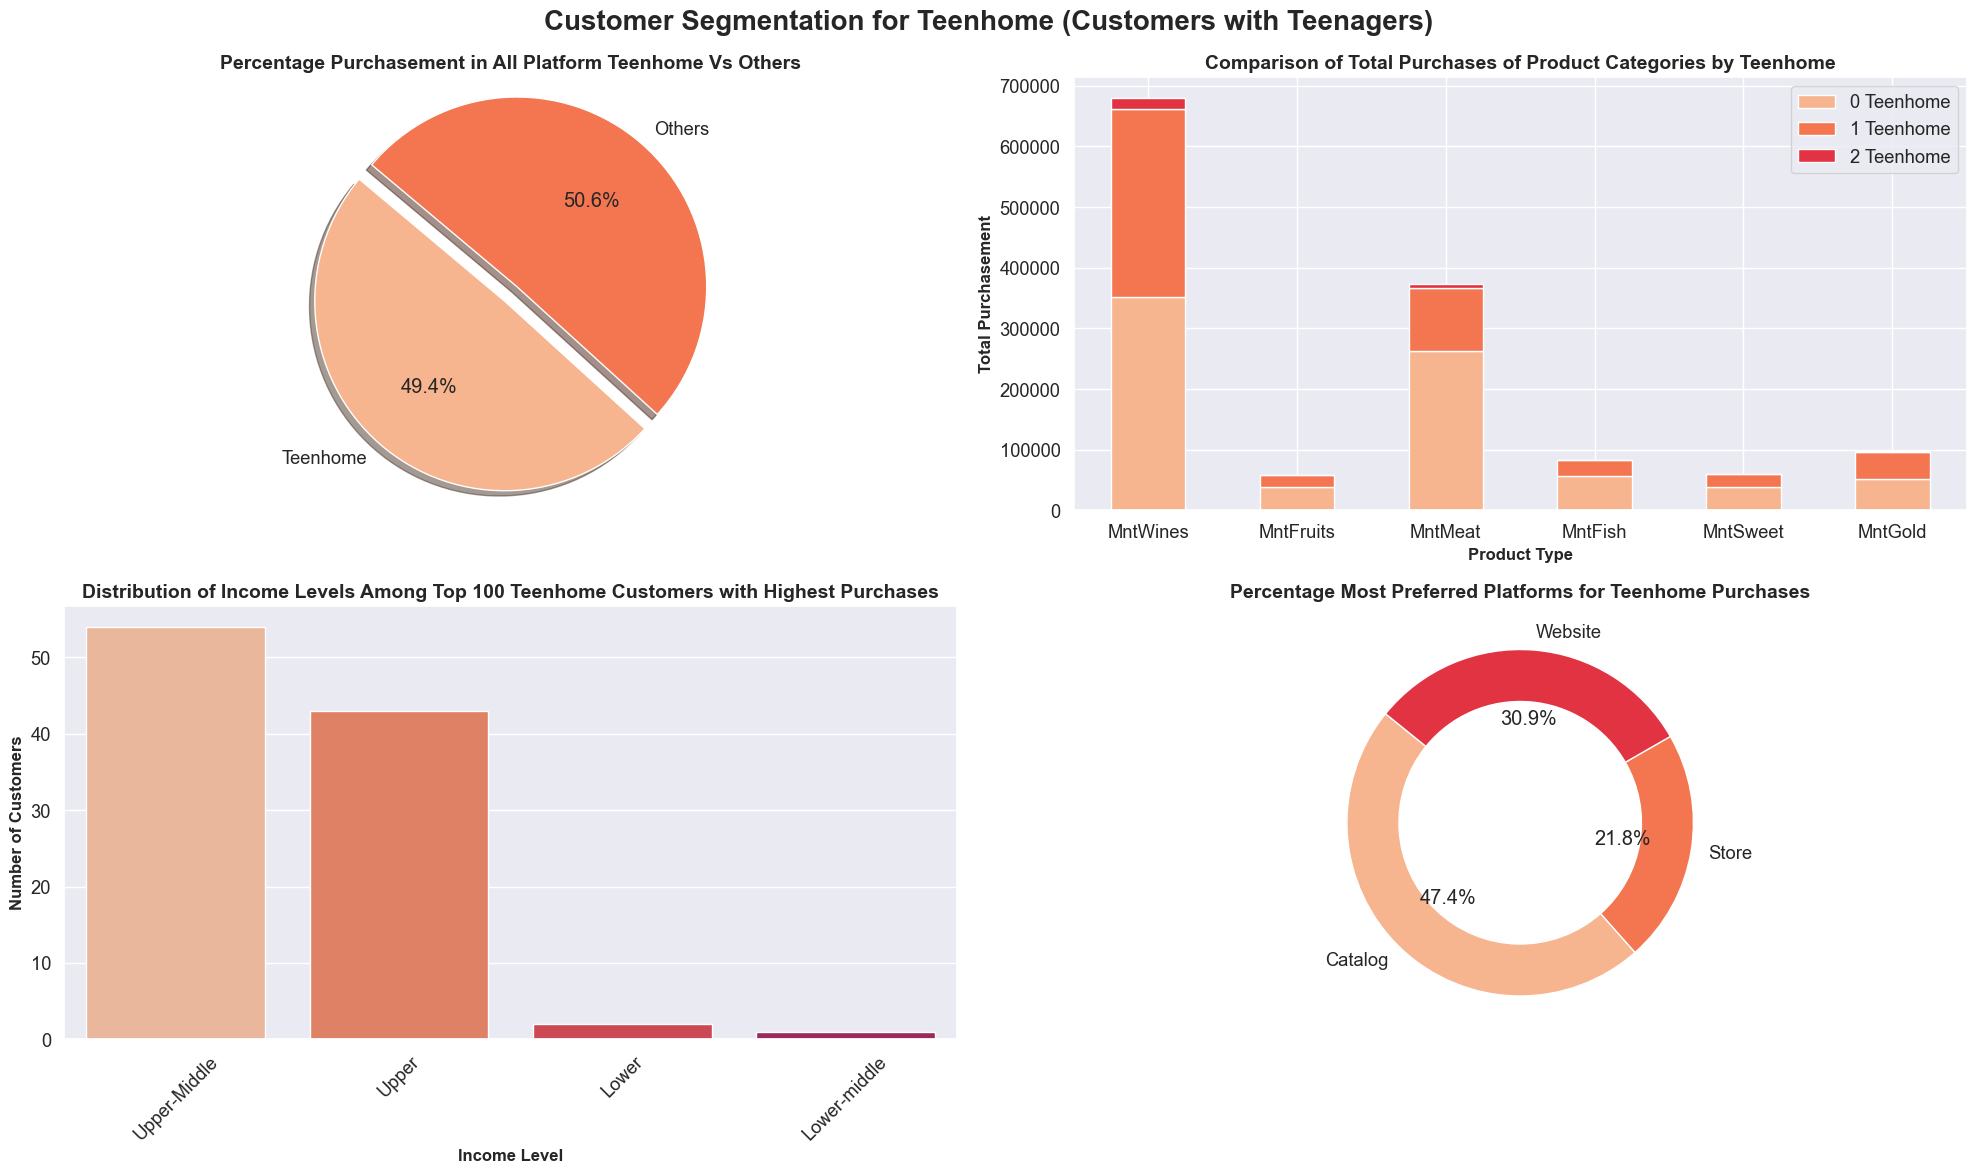

In [139]:
# Set the color palette
sns.set_palette("rocket_r")

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
df['Total_Purchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

total_purchases_teenhome = df[df['Teenhome'] > 0]['Total_Purchases'].sum()

total_purchases_all = df['Total_Purchases'].sum()

percentage_teenhome = (total_purchases_teenhome / total_purchases_all) * 100

#Subplot 1: Percentage Purchasement in All Platform Teenhome Vs Others
labels = ['Teenhome', 'Others']
sizes = [percentage_teenhome, 100 - percentage_teenhome]
explode = (0.1, 0) 
axes[0, 0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
axes[0, 0].axis('equal')
axes[0, 0].set_title('Percentage Purchasement in All Platform Teenhome Vs Others', size=14, fontweight='bold')

#Subplot 2: Comparison of Total Purchases of Product Categories by Teenhome
products = [col for col in df if col.startswith('Mnt')]
teen_purchase_product = df.groupby("Teenhome")[products].sum()

teen_purchase_product.T.plot(kind="bar", stacked=True, ax=axes[0, 1])
axes[0, 1].set_title("Comparison of Total Purchases of Product Categories by Teenhome", size=14, fontweight='bold')
axes[0, 1].set_xlabel("Product Type", size=12, fontweight='bold')
axes[0, 1].set_ylabel("Total Purchasement", size=12, fontweight='bold')
axes[0, 1].set_xticklabels(teen_purchase_product.T.index, rotation=0)
axes[0, 1].legend(labels=["0 Teenhome", "1 Teenhome", '2 Teenhome'])

# Subplot 3: Distribution of Income Levels Among Top 100 Teenhome Customers with Highest Purchases
teenhome_customers = df[df['Teenhome'] > 0]

top_100_teenhome_customers = teenhome_customers.sort_values(by='Total_Purchase', ascending=False).head(100)

income_level_counts = top_100_teenhome_customers['Income_Level'].value_counts().reset_index()
income_level_counts.columns = ['Income_Level', 'Customer_Count']

sns.barplot(x='Income_Level', y='Customer_Count', data=income_level_counts, ax=axes[1, 0])
axes[1, 0].set_xlabel('Income Level', size=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', size=12, fontweight='bold')
axes[1, 0].set_title('Distribution of Income Levels Among Top 100 Teenhome Customers with Highest Purchases', size=14, fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Subplot 4: 
total_catalog_purchases = df['NumCatalogPurchases'].sum()
total_store_purchases = df['NumStorePurchases'].sum()
total_web_purchases = df['NumWebPurchases'].sum()
total_purchases_teenhome = df[df['Teenhome'] > 0]['Total_Purchases'].sum()

percentage_catalog_purchases = (total_purchases_teenhome / total_catalog_purchases) * 100
percentage_store_purchases = (total_purchases_teenhome / total_store_purchases) * 100
percentage_web_purchases = (total_purchases_teenhome / total_web_purchases) * 100

labels = ['Catalog', 'Store', 'Website']
sizes = [percentage_catalog_purchases, percentage_store_purchases, percentage_web_purchases]
explode = (0.1, 0, 0)

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=141, wedgeprops={'width': 0.3})
axes[1, 1].set_title('Percentage Most Preferred Platforms for Teenhome Purchases', size=14, fontweight='bold')

# Set the main title
plt.suptitle('Customer Segmentation for Teenhome (Customers with Teenagers)', size=20, fontweight='bold')

plt.tight_layout()
plt.show()


Berdasarkan segmentasi pasar untuk teenhome, dapat disimpulkan:

1. **Percentage Purchasement in All Platform Teenhome Vs Others**
- pelanggan dengan remaja (Teenhome) berkontribusi sekitar 49.36% terhadap total pembelian yang dilakukan di berbagai platform yang tersedia.Analisis ini memberikan informasi  tentang preferensi pembelian di antara pelanggan Teenhome dan non-Teenhome, yang dapat digunakan untuk menyusun strategi pemasaran yang lebih efektif.
2. **Comparison of Total Purchases of Product Categories by Teenhome**
- Bisa dilihat bagaimana pengeluaran khusus pada produk tertentu berbeda berdasarkan jumlah remaja dalam rumah tangga. keluarga yang tidak memiliki remaja di rumahnya cenderung pengeluaran tertingginya terjadi pada kategori MntWines dan MntMeat. keluarga yang memiliki 1 remaja, pengeluaran pada kategori MntMeat cukup tinggi. sedangkan, pada kategori lainnya lebih rendah daripada kelompok tanpa remaja, dengan MntGold menjadi yang terendah. dan uniknya pengeluaran pada semua kategori produk sangat rendah dibandingkan dengan kelompok lainnya.
3. **Distribution of Income Levels Among Top 100 Teenhome Customers with Highest Purchases**
- Pelanggan dengan tingkat pendapatan "Upper-Middle" memiliki jumlah pengeluaran yang signifikan pada berbagai kategori produk, seperti MntWines, MntMeat, MntFish, dan MntGold. Ini menunjukkan bahwa pelanggan dengan pendapatan "Upper-Middle" cenderung menghabiskan lebih banyak uang pada produk mewah, seperti anggur (wine) dan daging (meat). sedangkan, umlah pelanggan untuk "Lower" dan "Lower-middle" sangat rendah (2 dan 1 pelanggan, masing-masing). Karena jumlah pelanggan yang sangat sedikit, pengaruh mereka terhadap persentase pembelian oleh keluarga dengan remaja kemungkinan sangat terbatas.
4. **Percentage Most Preferred Platforms for Teenhome Purchases**
- Pelanggan dengan remaja (Teenhome) cenderung melakukan sebagian besar pembelian mereka melalui katalog, dengan persentase sekitar 47.4% dari total pembelian. Pelanggan Teenhome mungkin lebih suka katalog adalah kemungkinan adanya penawaran khusus atau kupon dalam katalog yang menarik bagi keluarga yang lebih besar. Pelanggan Teenhome memiliki preferensi beragam dalam platform pembelian mereka, dengan pembelian melalui katalog menjadi yang paling dominan diikuti oleh situs web dan toko fisik.

### **4. Conclusion & Recomendation**



##### Conclusion
Dari analisis yang telah dilakukan, kesimpulan yang bisa diambil mengenai analisis segmentasi pasar ini adalah:
1. Penentuan campaign terbaii, yaitu:
   - Dari campaign 1-6 yang telah dijalani, campaign ke 6 (last) berhasil menarik jumlah respons terbanyak.
   - 80% campaign yang sudah dijalani diterima baik oleh konsumen.
   - purchasement tertinggi ada pada campaign 6.
2. berdasarkan segmentasi, yang dilakukan campaign 6 menjelaskan bahwa :
   - konsumen yang palinng banyak merespon campaign ini adalah adult (26-35 Tahun).
   - Jumlah keluarga di campaign 6 yang merespon, mulai dari keluarga dengan 1 orang sampai keluarga dengan 5 orang.
   - Dominasi preferensi produk di campaign 6 yang di sukai oleh semua keluarga adalah wine dan juga meat. 
   - latar belakang dengan penghasilan: upper-class, menjadi responder terbanyak pada campaign ini.
   - Keluarga yang memiliki remaja membeli produk paling sering ketika ada diskon berdasarkan akumulasi total purchasement baik itu melalui catalog, toko, web. 
3. Berdasarkan tujuan campaign 6 adalah meningkatkan sales, dibuktikan dengan adanya kenaikan total purchasement.
4. Respons yang tinggi dari kelompok usia adult dapat dijelaskan oleh pendapatan yang lebih stabil, kemampuan untuk mengambil keputusan pembelian yang signifikan, dan minat terhadap penawaran kampanye.
5.  Berdasarkan hasil uji, segmentasi campaign terbaik (campaign 6) dikatakan valid. Karena, terdapat peran dari purchasement behaviour upper class yang membantu kenaikan sales.

#### Recomendation
Dari kedimpulan diatas, berikut merupakan rekomendasi yang diharapkan dapat membantu peningkatan sales pada supermarket:
1. Program Bundling
   - Mengadakan penawaran produk yang terkait dengan wine dan meat. Misalnya, paket bundel yang mencakup wine dan daging segar dengan harga yang menarik.
   - Menyelenggarakan promosi diskon berdasarkan akumulasi total pembelian (total purchase) melalui katalog, toko, dan web. Ini dapat memberikan insentif bagi keluarga dengan remaja untuk berbelanja lebih banyak dan memanfaatkan diskon yang ditawarkan.
2. Program membership
   - memperkuat program keanggotaan atau loyalty untuk kelompok pelanggan yang merespon kampanye dengan baik. Program ini dapat mencakup poin atau diskon tambahan sebagai bentuk penghargaan.
   - Personalisasi komunikasi dan penawaran kepada pelanggan. Ini bisa mencakup pengiriman pesan dan promosi yang lebih sesuai dengan preferensi dan riwayat pembelian masing-masing pelanggan.
3. Tidak hanya itu, Dari segmentasi yang telah dibuat untuk Teenhome. Dapat membantu membuat strategy marketing baru dengan penjelasan:
   - 49.4% total purchasement dari platform semua platform telah dimiliki oleh teenhome.
   - Dari 100 customer yang melakukan pembelanjaan terbanyak,  keluarga yang memiliki remaja (Teenhome) ternyata ada pada kelas upper- middle.
   - perilaku konsumen teenhome menunjukan lebih suka membeli produk melalui catalog, diikuti website, dan store.
   - Sedangkan pola konsumsi dari tipe produk yang dibelanjakan, keluarga yang memiliki 1 remaja yang paling banyak melakuakn pembelian.
